# Aplicación de Filtros y Enmascaramiento
En este notebook, exploraremos cómo aplicar diferentes filtros a imágenes para mejorar su calidad visual, eliminar ruido o realzar bordes. También aprenderemos cómo usar máscaras para resaltar áreas específicas de una imagen.
---

In [1]:
# Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

## Cargar una Imagen
Primero, cargaremos una imagen en formato RGB para trabajar con ella.

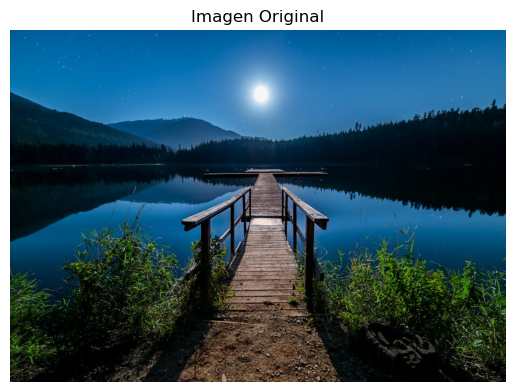

In [2]:
# Cargar la imagen de ejemplo
url = 'https://images.pexels.com/photos/414612/pexels-photo-414612.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'
response = requests.get(url, stream=True).raw
image = cv2.imdecode(np.asarray(bytearray(response.read()), dtype=np.uint8), cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
plt.imshow(image)
plt.axis('off')
plt.title('Imagen Original')
plt.show()

## Aplicación de Filtros
Vamos a aplicar varios filtros a la imagen:

### 1. Filtro Gaussiano (cv2.GaussianBlur)

Para suavizar la imagen y reducir ruido.
```
    cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None)
```

Parámetros:

    src: Imagen de entrada (1 o más canales).
    ksize: Tamaño del kernel, definido como un par (ancho, alto). Ambos deben ser números impares y positivos.
        Ejemplo: (3, 3), (5, 5), etc.
    sigmaX: Desviación estándar en el eje X. Si es 0, se calcula automáticamente en función de ksize.
    sigmaY (opcional): Desviación estándar en el eje Y. Si no se proporciona, se asume igual a sigmaX.
    dst (opcional): Imagen de salida. Si no se especifica, se crea una nueva.
    borderType (opcional): Tipo de borde usado al extrapolar píxeles fuera de los límites de la imagen.
        Ejemplo: cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, cv2.BORDER_DEFAULT, etc.

Notas:

    Un kernel más grande y un sigmaX mayor generan un efecto de suavizado más intenso.
    borderType es útil para evitar artefactos en los bordes.

- **Filtro Sobel** para detectar bordes.
- **Filtro de nitidez** para resaltar detalles.



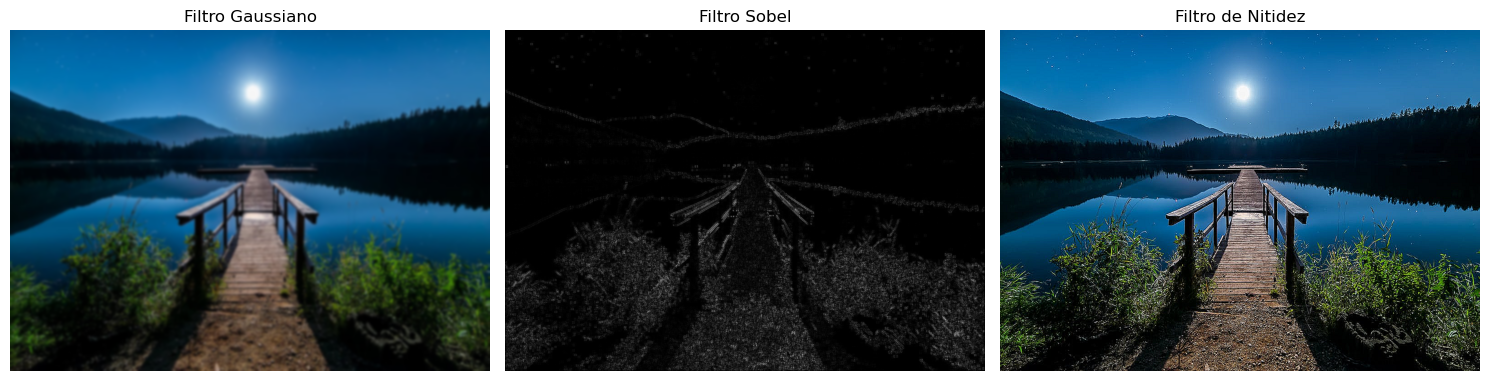

In [3]:
# Aplicar un filtro Gaussiano (suavizado)
gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)

# Aplicar un filtro Sobel (detección de bordes)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
sobel_edges = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)

# Aplicar un filtro de nitidez
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel_sharpen)

# Visualizar los resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gaussian_blur)
axes[0].set_title('Filtro Gaussiano')
axes[0].axis('off')
axes[1].imshow(np.abs(sobel_edges), cmap='gray')
axes[1].set_title('Filtro Sobel')
axes[1].axis('off')
axes[2].imshow(sharpened)
axes[2].set_title('Filtro de Nitidez')
axes[2].axis('off')
plt.tight_layout()
plt.show()

## Aplicación de Máscaras
Ahora crearemos una máscara para resaltar una región específica de la imagen.

Tamaño de la imagen (750, 1056, 3)


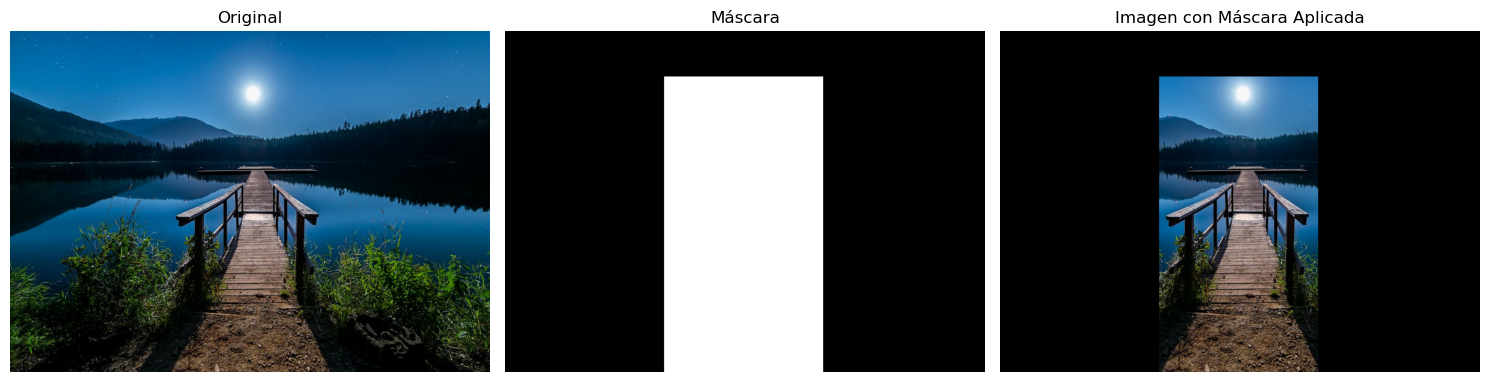

In [21]:
print("Tamaño de la imagen", image.shape)

# Crear una máscara para la imagen
mask = np.zeros_like(gray)
# mask [region_filas, region_columnas] = valor
mask[100:750, 350:700] = 255  # Región enmascarada

# Aplicar la máscara sobre la imagen original
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Visualizar la máscara y la imagen resultante
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Máscara AND')
axes[1].axis('off')
axes[2].imshow(masked_image)
axes[2].set_title('Imagen con Máscara Aplicada')
axes[2].axis('off')
plt.tight_layout()
plt.show()

## Conclusión
En este notebook, aprendimos a aplicar diferentes filtros para suavizar, detectar bordes y mejorar detalles en imágenes. También exploramos cómo usar máscaras para trabajar con regiones específicas.
Estas herramientas son fundamentales en el procesamiento de imágenes para tareas de visión por computador.